1 . What is Simple Linear Regression ?

 =>>

   Simple Linear Regression is a statistical and machine-learning method used to model the relationship between two variables by fitting a straight line to observed data.



2: What are the key assumptions of Simple Linear Regression?

=>>

Key Assumptions :-


*   There is a linear relationship between the independent variable (X) and the dependent variable (Y).


*   One observation does not influence another.
*   Extreme values should not strongly influence the regression line.



 3: What is heteroscedasticity, and why is it important to address in regression
models?

=>>

Heteroscedasticity means unequal error variance, and if ignored, it leads to unreliable statistical inference in regression models.

4: What is Multiple Linear Regression?

=>>

Multiple Linear Regression models the relationship between one dependent variable and multiple independent variables simultaneously.

 5: What is polynomial regression, and how does it differ from linear
regression?

=>>

Polynomial regression models non-linear relationships by adding polynomial terms to linear regression.

Polynomial regression extends linear regression by adding higher-order terms to capture non-linear relationships.

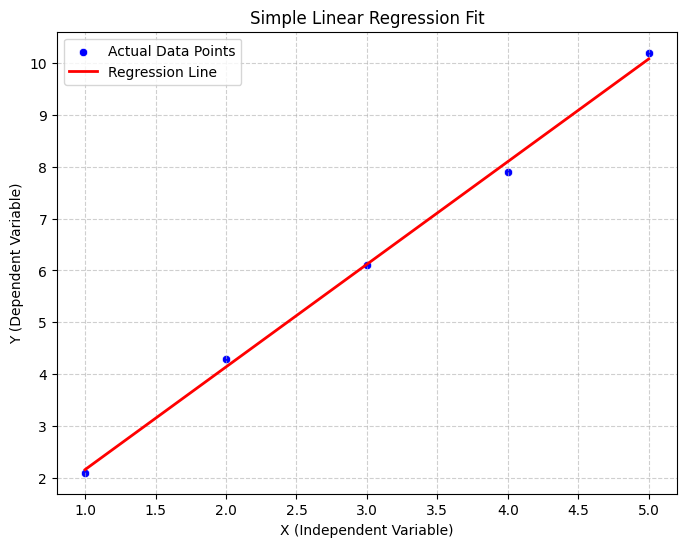

In [7]:
#6: Implement a Python program to fit a Simple Linear Regression model to
#the following sample data:● X = [1, 2, 3, 4, 5]● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
#Plot the regression line over the data points.


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)

plt.figure(figsize=(8, 6))

sns.scatterplot(x=X.flatten(),y=Y, color='blue', label='Actual Data Points')

sns.lineplot(x=X.flatten(),y=Y_pred, color='red', linewidth=2, label='Regression Line')

plt.title('Simple Linear Regression Fit')
plt.xlabel('X (Independent Variable)')
plt.ylabel('Y (Dependent Variable)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)


plt.show()


 7: Fit a Multiple Linear Regression model on this sample data:

● Area = [1200, 1500, 1800, 2000]

● Rooms = [2, 3, 3, 4]

● Price = [250000, 300000, 320000, 370000]
Check for multicollinearity using VIF and report the results.
(Include your Python code and output in the code box below.)


In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
data = {
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
}
df = pd.DataFrame(data)

X = df[['Area', 'Rooms']]
Y = df['Price']

model = LinearRegression()
model.fit(X, Y)
X_with_const = add_constant(X)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(len(X_with_const.columns))]
print("--- Regression Model Results ---")
print(f"Intercept: {model.intercept_:.2f}")
for feature, coef in zip(X.columns, model.coef_):
    print(f"Coefficient for {feature}: {coef:.2f}")

print("\n--- Multicollinearity Check (VIF) ---")
print(vif_data[vif_data['Feature'] != 'const']) # Display VIF for predictors only

--- Regression Model Results ---
Intercept: 103157.89
Coefficient for Area: 63.16
Coefficient for Rooms: 34736.84

--- Multicollinearity Check (VIF) ---
  Feature       VIF
1    Area  7.736842
2   Rooms  7.736842


 8: Implement polynomial regression on the following data:

● X = [1, 2, 3, 4, 5]

● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
Fit a 2nd-degree polynomial and plot the resulting curve.


--- Polynomial Regression Results (Degree 2) ---
Intercept: 0.0600
Coefficients: [0.   1.94 0.2 ]
Equation: y = 0.2000x^2 + 1.9400x + 0.0600


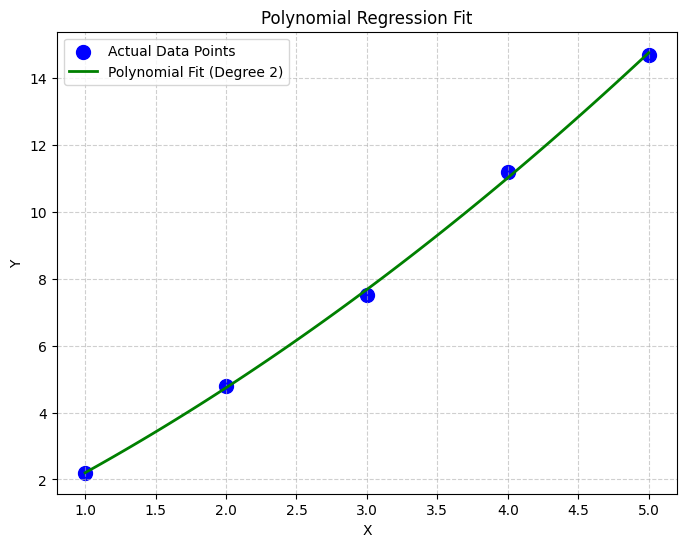

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 1. Prepare the Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# 2. Transform Features for Polynomial Regression (Degree 2)
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# 3. Fit the Model
model = LinearRegression()
model.fit(X_poly, Y)

# 4. Generate points for a smooth curve plot
X_smooth = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_smooth_poly = poly_features.transform(X_smooth)
Y_smooth_pred = model.predict(X_smooth_poly)

# 5. Output results
intercept = model.intercept_
coefs = model.coef_

print("--- Polynomial Regression Results (Degree 2) ---")
print(f"Intercept: {intercept:.4f}")
print(f"Coefficients: {coefs}")
print(f"Equation: y = {coefs[2]:.4f}x^2 + {coefs[1]:.4f}x + {intercept:.4f}")

# 6. Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Actual Data Points', s=100)
plt.plot(X_smooth, Y_smooth_pred, color='green', linewidth=2, label='Polynomial Fit (Degree 2)')

plt.title('Polynomial Regression Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

 9: Create a residuals plot for a regression model trained on this data:

● X = [10, 20, 30, 40, 50]

● Y = [15, 35, 40, 50, 65]
Assess heteroscedasticity by examining the spread of residuals.



<>:25: SyntaxWarning: invalid escape sequence '\h'
<>:26: SyntaxWarning: invalid escape sequence '\h'
<>:25: SyntaxWarning: invalid escape sequence '\h'
<>:26: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipython-input-3884094687.py:25: SyntaxWarning: invalid escape sequence '\h'
  plt.xlabel('Predicted Values ($\hat{Y}$)', fontsize=12)
/tmp/ipython-input-3884094687.py:26: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel('Residuals ($Y - \hat{Y}$)', fontsize=12)


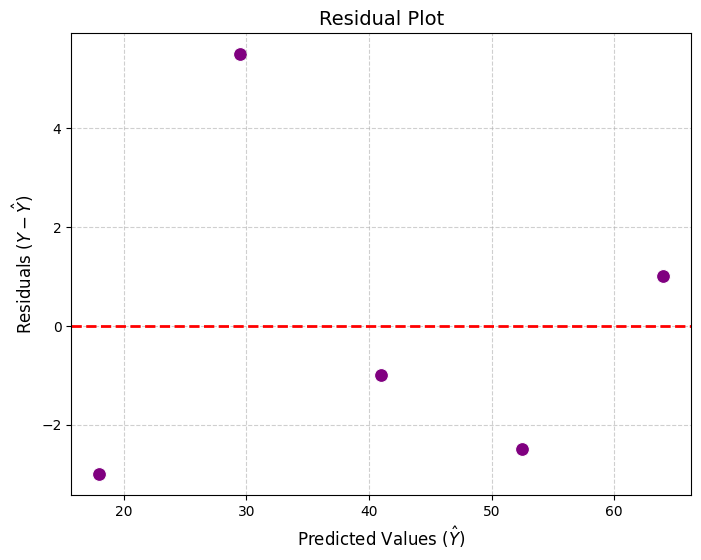

Predicted Values: [18.  29.5 41.  52.5 64. ]
Residuals: [-3.   5.5 -1.  -2.5  1. ]


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# 1. Prepare the Data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# 2. Fit the Linear Regression Model
model = LinearRegression()
model.fit(X, Y)

# 3. Calculate Predicted Values and Residuals
Y_pred = model.predict(X)
residuals = Y - Y_pred

# 4. Create the Residual Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_pred, y=residuals, color='purple', s=100)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2) # Reference line at zero

# Styling
plt.title('Residual Plot', fontsize=14)
plt.xlabel('Predicted Values ($\hat{Y}$)', fontsize=12)
plt.ylabel('Residuals ($Y - \hat{Y}$)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

# Display values for assessment
print("Predicted Values:", Y_pred)
print("Residuals:", residuals)

10. Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust
model.


I would log-transform the price, check VIF scores to remove redundant features, and then train a Ridge Regression model. This combination handles the non-constant variance and the correlation between features effectively.